### A Machine Learning Approach to Predict Forest Fires Using Meteorological Data

#### Author: Golpira Elmi Assadzadeh, PhD

# Introduction

A wildfire is an uncontrolled fire that consumes vegitation mostly in rural areas, and can be categorized by sveral factors such as cause of ignition, physical properties, combustable material, etc. Wildfires can cause significant damages to human property, and claim lives such as forest fires in Australia in early 2020 and Canadian forest fires in 2018. In Canada, wildfires have consumed an average of 2.5 million hectares a year. Wildfires can also have beneficial effects on our ecosystem (https://www.nrcan.gc.ca/our-natural-resources/forests-forestry/wildland-fires-insects-disturban/forest-fires/13143). It is beneficial to be able to predict forest fires for resource management purposes.

### Source
The dataset used in this study is from https://archive.ics.uci.edu/ml/datasets/forest+fires and is available for public download for research purposes. The data are collected from Montesinho national park in Portugal, and details are described in the work of Cortez and Morais, 2007. It contains 517 rows with 13 different features.

### Feature Description
X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

month - month of the year: "jan" to "dec"

day - day of the week: "mon" to "sun"

FFMC - FFMC index from the FWI system: 18.7 to 96.20

DMC - DMC index from the FWI system: 1.1 to 291.3

DC - DC index from the FWI system: 7.9 to 860.6

ISI - ISI index from the FWI system: 0.0 to 56.10

temp - temperature in Celsius degrees: 2.2 to 33.30

RH - relative humidity in %: 15.0 to 100

wind - wind speed in km/h: 0.40 to 9.40

rain - outside rain in mm/m2 : 0.0 to 6.4

area - the burned area of the forest (in ha): 0.00 to 1090.84

#### Import Libraries

In [547]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
%matplotlib inline

In [504]:
import warnings
warnings.filterwarnings("ignore")

#### Reading file from website

In [505]:
url='https://raw.githubusercontent.com/golpiraelmi/Forest-Fires/master/forestfires.csv'
df = pd.read_csv(url)
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Columns names in the dataset

In [506]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

#### Data types stored in each column

In [507]:
df.dtypes 

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

#### Size of dataset (number of columns X number of rows)

In [508]:
df.size 

6721

#### Dataset shape

In [509]:
df.shape

(517, 13)

#### Check to see if there is any missing value in the dataset

In [510]:
print (df.isnull().values.any())

False


#### Capitalizing month and day names

In [511]:
df['month'] = df['month'].str.capitalize()   # Capitalizing the Month and day column values
df['day'] = df['day'].str.capitalize() 
df.head(5) 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,Mar,Fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,Oct,Tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,Oct,Sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,Mar,Fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,Mar,Sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Data analysis

The following plots show the distribution of various features in the forestfire dataset

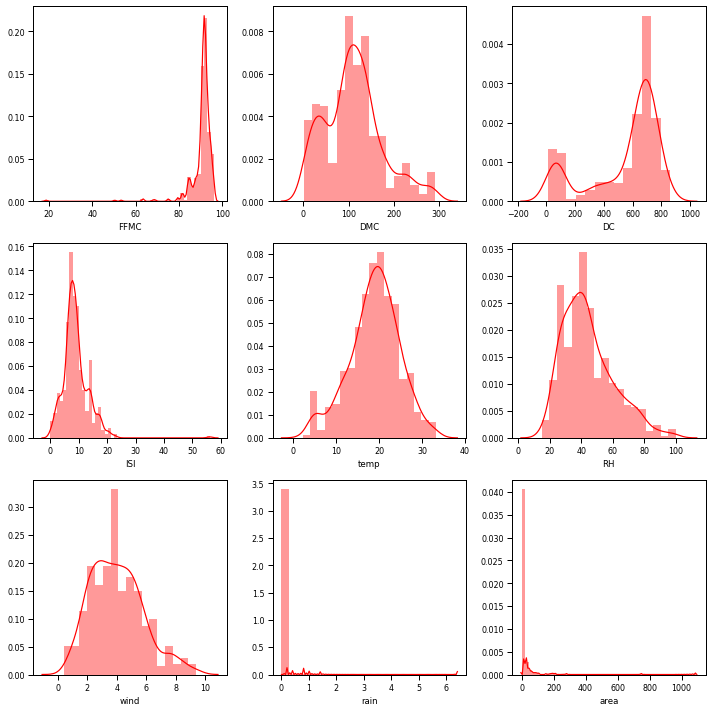

In [512]:
f, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False)
sns.distplot(df['FFMC'] , color="r", ax=axes[0, 0])
sns.distplot(df['DMC'] , color="r", ax=axes[0, 1])
sns.distplot(df['DC'] , color="r", ax=axes[0, 2])
sns.distplot(df['ISI'] , color="r", ax=axes[1, 0])
sns.distplot(df['temp'] , color="r", ax=axes[1, 1])
sns.distplot(df['RH'] , color="r", ax=axes[1, 2])
sns.distplot(df['wind'] , color="r", ax=axes[2, 0])
sns.distplot(df['rain'] , color="r", ax=axes[2, 1])
sns.distplot(df['area'] , color="r", ax=axes[2, 2])
plt.tight_layout()
plt.show()

### Analyzing damaged areas
For this project, a burnt area of less than 1 acre is defined as no damage, and a burnt area of greater than 1 acre is defined as a damaged area. The result are stored in a new column called "damage".

In [513]:
def fire_cat(area):
    if area <= 1:
        return "No"
    elif area > 1:
        return "Yes"

df['damage'] = df['area'].apply(fire_cat)
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage
0,7,5,Mar,Fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No
1,7,4,Oct,Tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No
2,7,4,Oct,Sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No
3,8,6,Mar,Fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,No
4,8,6,Mar,Sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,No


In order to create a boxplot comparing features for damaged and non-damaged areas, all numeric features are gathered into a column called feature, with their associated values are stored in a value column. This data is stored in a dataframe called df_n.

In [514]:
# melt function works like gather in R.
df_n = pd.melt(df, id_vars=['damage'], value_vars=['FFMC', 'DMC', 'DC', 'ISI','temp', 'RH', 'wind', 'rain'], 
               var_name='feature', value_name='value')

df_n.head(5)

,damage,feature,value
0,No,FFMC,86.2
1,No,FFMC,90.6
2,No,FFMC,90.6
3,No,FFMC,91.7
4,No,FFMC,89.3


The followin code creates a boxplot comapring various features categorized by damage column.

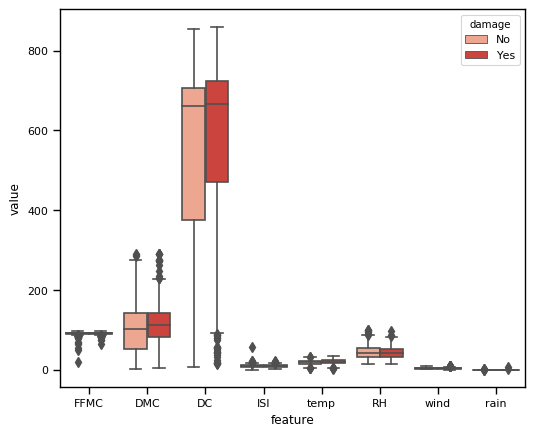

In [515]:
plt.figure(figsize=(6,5), dpi=100)
ax = sns.boxplot(x="feature", y="value", hue="damage",
                 data=df_n, palette="Reds")

The following code maps the damaged sites based on the severity of damage.

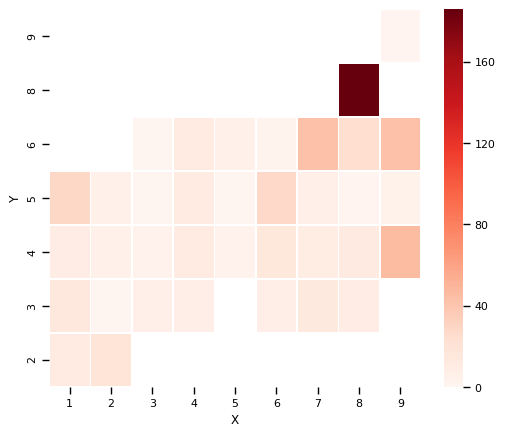

In [516]:
plt.figure(figsize=(6,5), dpi=100)
heatmap_data = pd.pivot_table(df, values='area', index='Y', columns='X')
ax=sns.heatmap(heatmap_data, linewidths=.5, cmap="Reds")
ax.invert_yaxis()
plt.show()

#### Correlation matrix

To see how different features are correlated with each other the correlation matrix is calculated and plotted.

In [517]:
df.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


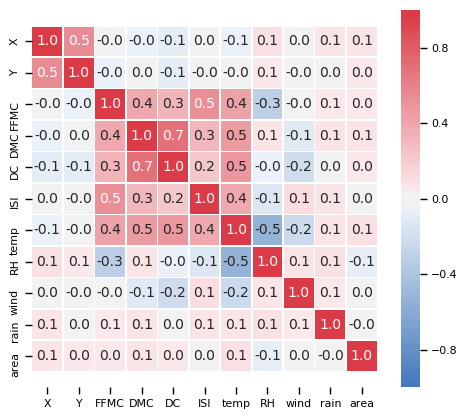

In [518]:
plt.figure(figsize=(6,5), dpi=100)

ax= sns.heatmap(df.corr(), fmt= '.1f', vmin=-1, vmax=1, center=0, linewidths=.5,
    cmap=sns.diverging_palette(610, 730, n=100),
    square=True, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Sactterplot showing the relationship betwween various features in forestfire dataset.

<Figure size 600x600 with 0 Axes>

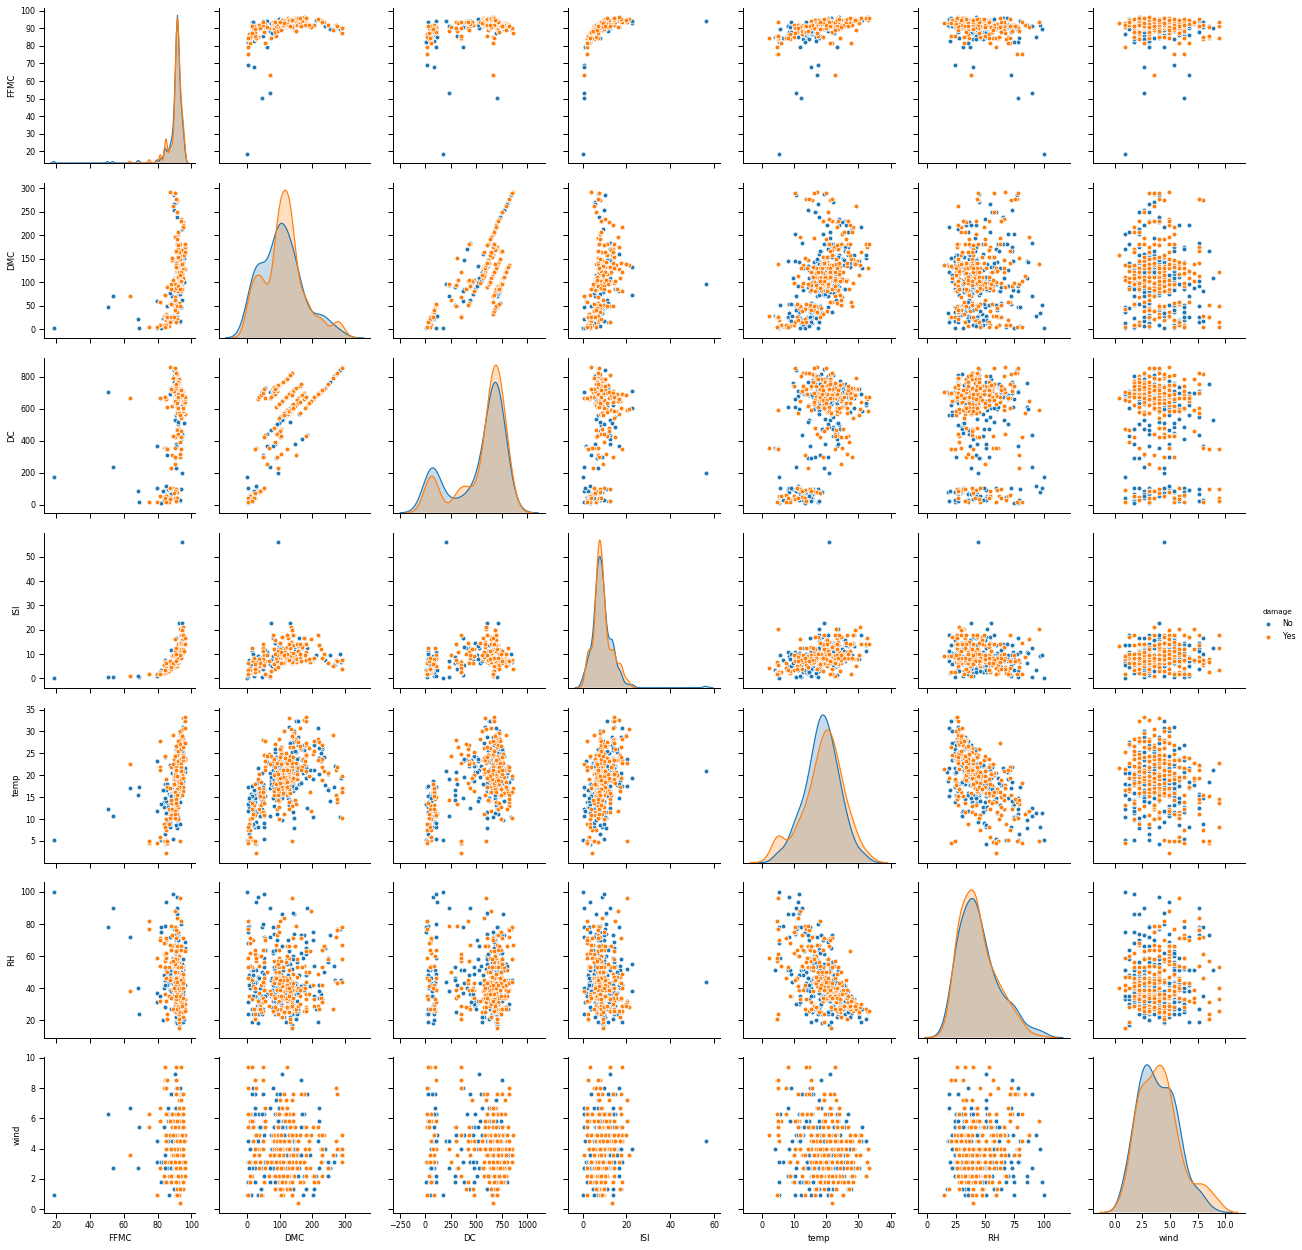

In [519]:
plt.figure(figsize=(6,6), dpi=100)
df_= df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'damage']]
sns.pairplot(df_, kind="scatter", hue='damage')
plt.show()

To determine the most hazardous month and day, all damaged areas are filtered and store it in a dataframe called df_damaged.

In [520]:
# filter all rows with damage=Yes 
df_damaged = df.loc[(df['damage'] == 'Yes')]

The following code separates categorical columns from numerical columns in df_damaged dataframe. Columns area and damage (containing only "yes" values) were also dropped.

In [521]:
dfa = df_damaged.drop(columns=['area','damage'])  # dataframe of independent variables
cat_columns_damaged = dfa.select_dtypes(include='object').columns.tolist() # making a list of categorical columns
num_columns_damaged = dfa.select_dtypes(exclude='object').columns.tolist() #making a list of numerical columns

cat_columns_damaged,num_columns_damaged

(['month', 'day'],
 ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'])

The following code creates a bar plot showing the number of damaged sites for each month and day.

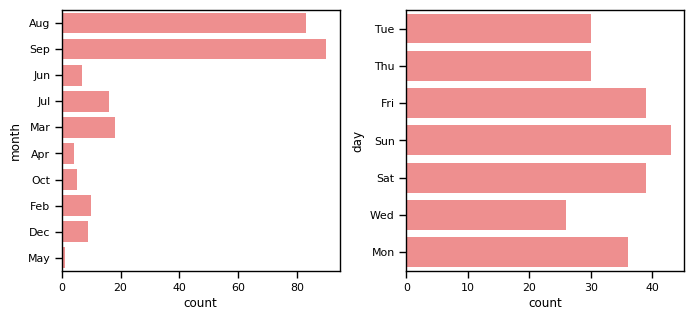

In [522]:
# analyzing categorical columns
plt.figure(figsize=(7,6), dpi=100)
for i,col in enumerate(cat_columns_damaged,1):
    
    sns.set_context("paper", font_scale=0.9)
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col, color='red', alpha=0.5)
   
plt.tight_layout()
plt.show() 

# Machine Learning

### Encoding data

In order to be able to use categorical variables in machine learning, dummy varibles have been created for month and day columns.

In [523]:
# Creating dummy variables
dummy_day= pd.get_dummies(df['day']).rename(columns=lambda x: str(x))
dummy_month = pd.get_dummies(df['month']).rename(columns=lambda x: str(x))

# Joining dummy variables to forestfire dataset
df= pd.concat([df, dummy_day, dummy_month], axis=1)

### Dropping some columns: 

A- Dropped coordinates: Coordinates are not resulting fire and should not be included in algorithm (unless, they are related to park to campsites where people turn on fire and forget to put it off before they leave, but that information is not provided in this dataset). 

B- Dropped month and day column because dummy variables have already been created.

C- Dropped "May, April, and October" as only a few forest fires occured in these month.

In [524]:
df = df.drop(['X','Y','month','day', 'May', 'Apr', 'Oct'], axis=1)
df.head(5)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage,...,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,Nov,Sep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No,...,0,0,0,0,0,0,0,1,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No,...,0,0,0,0,0,0,0,0,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No,...,0,0,0,0,0,0,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,No,...,0,0,0,0,0,0,0,1,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,No,...,0,0,0,0,0,0,0,1,0,0


### Preparing dataset

In order to use SKlearn, dataframes need to be converted to Numpy arrays. In addition, independent variables are stored in matrix called X, and dependent variable (damage) is stored in matrix called y.

In [525]:
X = df.drop('damage', axis=1).values.astype(float)
X[0:3]

array([[ 86.2,  26.2,  94.3,   5.1,   8.2,  51. ,   6.7,   0. ,   0. ,
          1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ],
       [ 90.6,  35.4, 669.1,   6.7,  18. ,  33. ,   0.9,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [ 90.6,  43.7, 686.9,   6.7,  14.6,  33. ,   1.3,   0. ,   0. ,
          0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ]])

In [526]:
y = df['damage'].values
y[0:5]

array(['No', 'No', 'No', 'No', 'No'], dtype=object)

### Normalizing data
Standard scaler is used to transform the data to have mean of 0 and standard deviation of 1.

In [527]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:3]

array([[-0.81, -1.32, -1.83, -0.86, -1.84,  0.41,  1.5 , -0.07, -0.2 ,
         2.25, -0.41, -0.44, -0.47, -0.37, -0.38, -0.34, -0.74, -0.13,
        -0.2 , -0.06, -0.26, -0.18,  2.93, -0.04, -0.71],
       [-0.01, -1.18,  0.49, -0.51, -0.15, -0.69, -1.74, -0.07, -0.2 ,
        -0.44, -0.41, -0.44, -0.47, -0.37,  2.66, -0.34, -0.74, -0.13,
        -0.2 , -0.06, -0.26, -0.18, -0.34, -0.04, -0.71],
       [-0.01, -1.05,  0.56, -0.51, -0.74, -0.69, -1.52, -0.07, -0.2 ,
        -0.44, -0.41,  2.27, -0.47, -0.37, -0.38, -0.34, -0.74, -0.13,
        -0.2 , -0.06, -0.26, -0.18, -0.34, -0.04, -0.71]])

## Dividing dataset to training and test sets:
Ten percent of dataset is kept for final model validation (after the best model is picked). The remaining 90% (465 rows) are overwritten as X and y and are used for model training. A 10-fold cross validation will be applied on this 90%.

In [528]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.1, random_state=4)
print ('Train set:', X.shape,  y.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (465, 25) (465,)
Test set: (52, 25) (52,)


# Logistic Regression

## Tuning parameter "C" in Logistic Regression 
The idea is to choose a C value that offers the smallest difference between the training and testing accuracy. The following code searches through various c values (C_param_range) and calculates the minimum difference between training and test accuracy.

In [529]:
logistic=LogisticRegression(solver='sag', max_iter=10000)
penalty=['l2']
c=[0.001,0.01,0.1,1,10,100,1000,10000]
hyper_params= dict(C=c, penalty=penalty)
clf_LR=GridSearchCV(logistic, hyper_params, cv=10)
best_model=clf_LR.fit(X,y)
print (best_model.best_estimator_.get_params()['C'])

1000


## Classification using K-fold Cross Validation for Logistic Regression

As this dataset only contains 517 rows, simple train-test split will result in loss of data and therefore poor predictions. A 10-fold cross validation is used to compensate for this problem. The dataset is divided to 10 subsets (9 subsets used for training and 1 for testing). The tet dataset has not been seen by training data. This process is repeated several times so that entire dataset is predicted. 

In [530]:
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=False)
LR = LogisticRegression(C=1000, solver='sag', max_iter=10000)
model_LR = LR.fit(X,y)
scores = cross_val_score(model_LR, X, y, scoring="accuracy", cv=crossvalidation, n_jobs=1)
y_hat_LR = cross_val_predict(LR, X, y, cv=crossvalidation)

Here is the predicted values using logistic regression:

In [531]:
d_y_logreg = {'True_value': y, 'Predicted_value': y_hat_LR}
comparison_y_LR = pd.DataFrame(data=d_y_logreg)
comparison_y_LR

,True_value,Predicted_value
0,Yes,Yes
1,No,No
2,No,No
3,Yes,Yes
4,Yes,Yes
...,...,...
460,No,No
461,Yes,No
462,No,No
463,Yes,Yes


### Confusion Matrix

In [532]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Computing confusion matric for logistic regression algorithm

Confusion matrix, without normalization
[[183  36]
 [  0 246]]


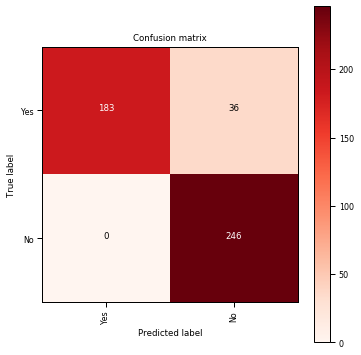

In [533]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y, y_hat_LR, labels=['Yes','No'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],normalize= False)

#### Calculating accuracy, sensitivity, and specificity for logistic regression

In [534]:
accuracy_LR=(cnf_matrix[0,0]+cnf_matrix[1,1])/517
print ('Accuracy_LR : ', '{:.2f}'.format(accuracy_LR))

sensitivity_LR = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Sensitivity_LR : ', '{:.2f}'.format(sensitivity_LR))

specificity_LR = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Specificity_LR : ','{:.2f}'.format(specificity_LR))

Accuracy_LR :  0.83
Sensitivity_LR :  0.84
Specificity_LR :  1.00


In [535]:
# A more pythonic way to achieve the same thing
print (classification_report(y, y_hat_LR))

              precision    recall  f1-score   support

          No       0.87      1.00      0.93       246
         Yes       1.00      0.84      0.91       219

    accuracy                           0.92       465
   macro avg       0.94      0.92      0.92       465
weighted avg       0.93      0.92      0.92       465



Logistic regression reaches 83% accuracy.

# Decision Tree Classifier

#### Tuning for maximum depth and criterion

In [536]:
decisiontree = tree.DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = range(1,20)

# Create a dictionary of all the parameter options 
parameters = dict(criterion=criterion, max_depth=max_depth)

clf_DT=GridSearchCV(decisiontree, parameters, cv=10)
best_model=clf_DT.fit(X,y)
print('Best Criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 1


## K-fold cross validation for Decision Tree

In [537]:
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=False)
DT = DecisionTreeClassifier(criterion="gini", max_depth = 1)
model_DT=DT.fit(X,y)

scores = cross_val_score(model_DT, X, y, scoring="accuracy", cv=crossvalidation, n_jobs=1)

y_hat_DT = cross_val_predict(DT, X, y, cv=crossvalidation)

In [538]:
d_y_dtree = {'True_value': y, 'Predicted_value': y_hat_DT}
comparison_y_DT = pd.DataFrame(data=d_y_dtree)
comparison_y_DT

,True_value,Predicted_value
0,Yes,Yes
1,No,No
2,No,No
3,Yes,Yes
4,Yes,Yes
...,...,...
460,No,No
461,Yes,Yes
462,No,No
463,Yes,Yes


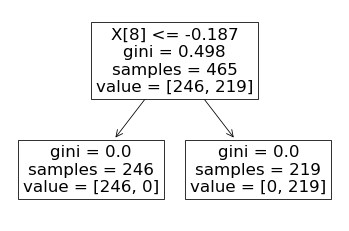

In [539]:
tree.plot_tree(DT) 
plt.show()

Confusion matrix, without normalization
[[218   1]
 [  1 245]]


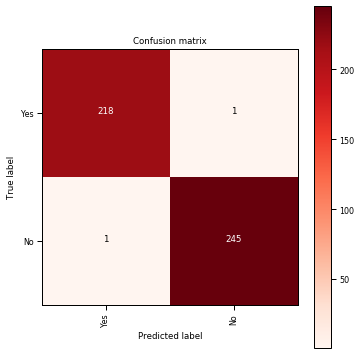

In [540]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y, y_hat_DT, labels=['Yes','No'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],normalize= False)

In [541]:
accuracy_DT=(cnf_matrix[0,0]+cnf_matrix[1,1])/517
print ('Accuracy_DT : ', '{:.2f}'.format(accuracy_DT))

sensitivity_DT = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Sensitivity_DT : ', '{:.2f}'.format(sensitivity_DT))

specificity_DT = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Specificity_DT : ','{:.2f}'.format(specificity_DT))

Accuracy_DT :  0.90
Sensitivity_DT :  1.00
Specificity_DT :  1.00


Decision tree clasifier has better accuracy (90%) compared to logistic regression, and is the algorithm of choice. The unseen test data will be evaluated for accuracy.

###  Test the final model on the test set to check for accuracy:

In [542]:
yhat = model_DT.predict(X_test)

In [543]:
d_y_dt = {'True_value': y_test, 'Predicted_value': yhat}
comparison = pd.DataFrame(data=d_y_dt)
comparison.head(10)

,True_value,Predicted_value
0,Yes,Yes
1,No,No
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,No,No
8,No,No
9,No,No


In [544]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  1.0


## Conclusion and Future Work
A decision tree algorithm is caple of classifying fire damage with a high model accuracy. The predictive model at best is as good as the dataset at hand. Much more information needed to be able to understand the real cause of fire that cannot be incorporated in this prediction due to lack of data. Information such as camp site locations, and number of park visitors can better explain why fires are more frequent on weekends or whether the fires are caused by humans rather than pure natural causes.

## Reference:
P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.
In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence,
Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December,
Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.
Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf